# Magic and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

%matplotlib inline

In [2]:
# runtime needs to be restarted after running this cell

!pip install arch yfinance pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima

In [4]:
# importing data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

# Exploratory Data Analysis

## DataFrame formatting

In [6]:
# replacing index

data = data.set_index('Merchant Name')

In [7]:
# replacing columns names with standard date format

dates = pd.date_range(start='2020-08', end='2022-10', freq="M")
data.columns = dates

In [8]:
data.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,175.0,159.0,180.0,162.0,183.0,172.0,198.0,183.0,226.0,185.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,132.0,147.0,129.0,127.0,131.0,159.0,150.0,160.0,154.0,168.0


In [9]:
data.shape

(1913, 26)

## Total sum by month

In [10]:
# adding total

data.loc['total'] = data.sum()
data.tail()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
Merchant 1911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Merchant 1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Merchant 1913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
total,5983120.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,...,8402646.0,7843850.0,7574393.0,7370176.0,7186898.0,8664142.0,7156954.0,7421947.0,7867331.0,7710690.0


In [11]:
data.shape

(1914, 26)

In [12]:
data.loc['total'][0]

5983120.0

In [13]:
df = pd.DataFrame(data.loc['total'].T)
df.index.name = 'Month'
df.head()

,total
Month,
2020-08-31,5983120.0
2020-09-30,5566534.0
2020-10-31,5730157.0
2020-11-30,6141497.0
2020-12-31,7070023.0


# SUM data to use

In [14]:
# SUM = sum of all merchants

df.head()

,total
Month,
2020-08-31,5983120.0
2020-09-30,5566534.0
2020-10-31,5730157.0
2020-11-30,6141497.0
2020-12-31,7070023.0


# ADFT

In [15]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df['total'])

# > 0.05 => non-stationary

(0.26812698256246603, True)

# Train-test split

In [16]:
test_size = 0.8

train_rows = round(len(df) * test_size)
test_rows =  len(df) - train_rows

train_rows, test_rows

(21, 5)

In [17]:
train = pd.DataFrame({"total" : df["total"][:train_rows].values,
                      'Month' : df["total"][:train_rows].index})
train = train.set_index('Month')
train.shape

(21, 1)

In [18]:
test = pd.DataFrame({"total" : df["total"][train_rows:].values,
                      'Month' : df["total"][train_rows:].index})
test = test.set_index('Month')
test.shape

(5, 1)

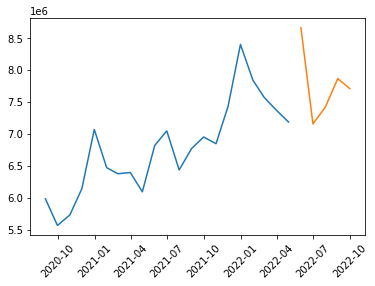

In [19]:
plt.plot(train)
plt.plot(test)
plt.xticks(rotation=45)
plt.show()

# AUTO-ARIMA

In [20]:
# p = number of lag observations included in the model
# d = number of times that the raw observation are differenced
# q = size of moving average window (order of moving average)

In [21]:
# to forecast multiple timesteps into the future
# we need to include the months as an exogenous variable to be forecasted as well

df['month_index'] = df.index.month

In [22]:
df['month_index'][:13]

Month
2020-08-31     8
2020-09-30     9
2020-10-31    10
2020-11-30    11
2020-12-31    12
2021-01-31     1
2021-02-28     2
2021-03-31     3
2021-04-30     4
2021-05-31     5
2021-06-30     6
2021-07-31     7
2021-08-31     8
Freq: M, Name: month_index, dtype: int64

In [23]:
# forecasting for n periods
# adding month_index for forecast_df

def sarimax_forecast(SARIMAX_model, periods=12):

    # forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"month_index":pd.date_range(df.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, return_conf_int=True,
                                            # including exogenous variable
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    #fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # plot
    plt.figure(figsize=(20,10))
    plt.plot(df["total"], color='#1f76b4')
    plt.plot(fitted, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Transactions")
    plt.show()

In [24]:
df[:1]

,total,month_index
Month,,
2020-08-31,5983120.0,8


## SUM train

In [25]:
# to forecast multiple timesteps into the future
# we need to include the months as an exogenous variable to be forecasted as well

train['month_index'] = train.index.month
test['month_index'] = test.index.month

In [26]:
# SARIMAX model setup
# working with test_size = 0.8
# not working with test_size =0.7

SARIMAX_model_train = auto_arima(train[['total']], 
                           exogenous=train[['month_index']],
                           start_p=1, 
                           start_q=1,
                           test='adf',
                           max_p=3, max_q=3, 
                           m=12,
                           start_P=0, 
                           seasonal=True,
                           d=None, 
                           D=1, 
                           trace=False,
                           error_action='warn',  
                           suppress_warnings=True, 
                           stepwise=True)

In [27]:
# SARIMAX model summary

SARIMAX_model_train.summary()

# for SUM p-value < 0.05 => significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   21
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -118.951
Date:                            Tue, 22 Nov 2022   AIC                            243.902
Time:                                    11:28:09   BIC                            244.493
Sample:                                08-31-2020   HQIC                           242.625
                                     - 04-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.361e+06   1.12e+05     12.160      0.000    1.14e+06    1.58e+06
ar.L1         -0.0955      0.083     -1.153      0.249      -0.258       0.067
sigma2      1.884e+10      0.193   9.78e+10      0.000    1.88e+10    1.88e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.21   Prob(JB):                         0.65
Heteroskedasticity (H):               4.36   Skew:                            -0.62
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.81e+27. Standard errors may be unstable.
"""

## SUM test

In [28]:
# forecasting for n periods
# adding month_index for forecast_df
# adding train and test splits into function
# periods = 5 as 5 months in test split

def sarimax_forecast_train(SARIMAX_model, train, test, periods=test_rows):

    # forecast
    n_periods = periods

    df = train.copy(deep=True) # taking only train part same df name
                               # to fasten code reproduction

    forecast_df = pd.DataFrame({"month_index":pd.date_range(df.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    #fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(20,10))
    plt.plot(df["total"], color='#1f76b4')
    plt.plot(fitted, color='darkgreen')
    plt.plot(test, color='#1f76b4')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Transactions")
    plt.show()

    # error
    results = pd.DataFrame({'historical' : test['total'].values,
                            'prediction' : fitted.values})
    print(results)
    rmse = sqrt(sklearn.metrics.mean_squared_error(results['historical'].values, results['prediction'].values))
    print('Test RMSE: %.3f' % rmse)

In [29]:
# predict

SARIMAX_model_train.predict(n_periods=test_rows)

2022-05-31    8.076404e+06
2022-06-30    8.289353e+06
2022-07-31    7.678548e+06
2022-08-31    8.013311e+06
2022-09-30    8.193873e+06
Freq: M, dtype: float64

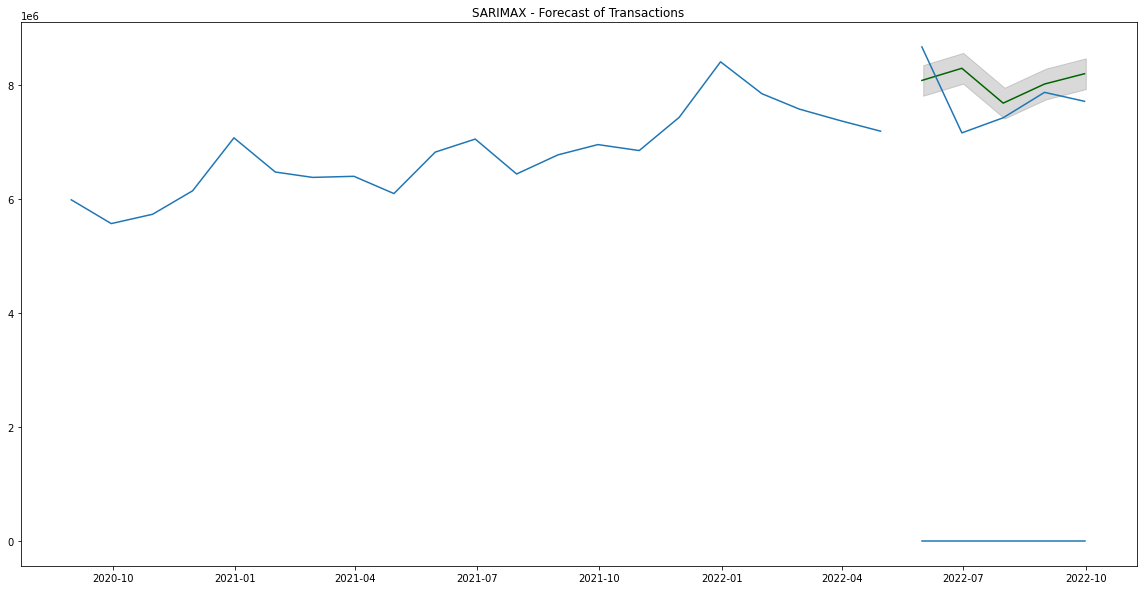

   historical    prediction
0   8664142.0  8.076404e+06
1   7156954.0  8.289353e+06
2   7421947.0  7.678548e+06
3   7867331.0  8.013311e+06
4   7710690.0  8.193873e+06
Test RMSE: 624240.969


In [30]:
# comparing actual test vs predict

sarimax_forecast_train(SARIMAX_model_train, train, test, periods=test_rows)

# Prediction on 12 months

In [31]:
# SARIMAX model setup
# full df monthly datanpoints

SARIMAX_model_prediction = auto_arima(df[['total']], exogenous=df[['month_index']],
                           start_p=1, 
                           max_p=3,
                           start_q=1, 
                           max_q=3,
                           d=None,
                           max_d=2,
                           start_P=1,
                           max_P=2,
                           start_Q=1,
                           max_Q=2,
                           D=1,
                           max_D=2,
                           m=12,  
                           seasonal=True,
                           test='adf',
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

In [32]:
SARIMAX_model_prediction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -190.477
Date:                            Tue, 22 Nov 2022   AIC                            384.954
Time:                                    11:28:12   BIC                            386.084
Sample:                                08-31-2020   HQIC                           384.722
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1695      0.097     -1.756      0.079      -0.359       0.020
sigma2      2.498e+11   9.06e-14   2.76e+24      0.000     2.5e+11     2.5e+11
===================================================================================
Ljung-Box (L1) (Q):                   4.28   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.04   Prob(JB):                         0.04
Heteroskedasticity (H):              17.31   Skew:                            -1.28
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+39. Standard errors may be unstable.
"""

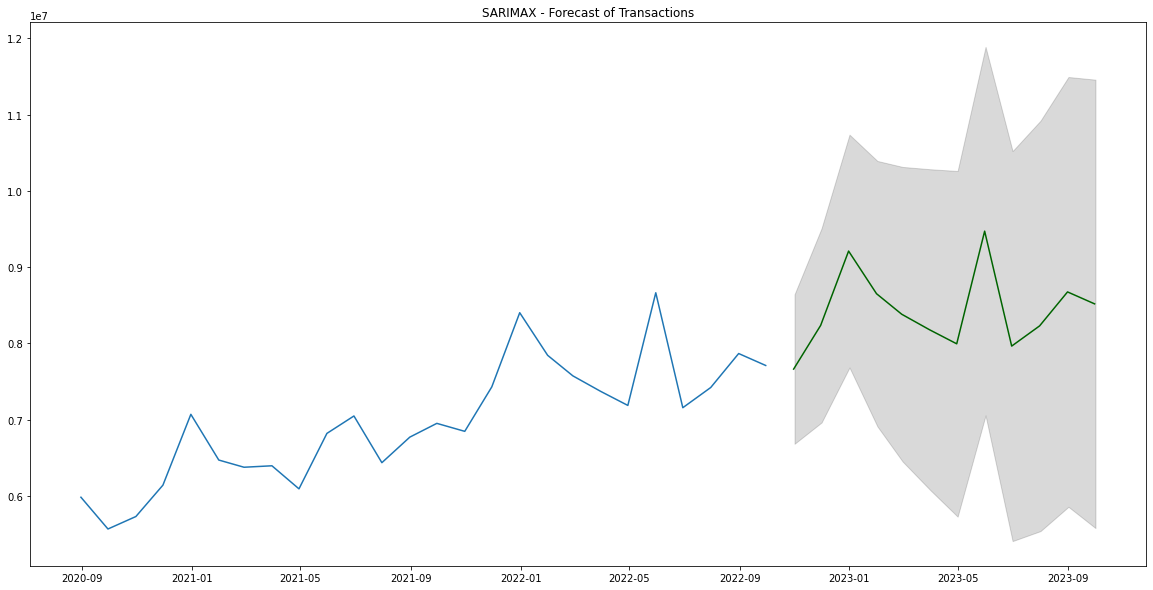

In [33]:
sarimax_forecast(SARIMAX_model_prediction, periods=12)

# BETKA AUTOMATIC FUNCTION

In [34]:
import scipy

In [35]:
def normalize_error(y,metric,method):
  # method = avarage, range, iqr
  if method == 'average':
    metric = metric/y.mean()
  elif method == 'range':
    metric = metric/(y.max()-y.min())
  else:
    metric = metric/scipy.stats.iqr(y)
  return metric

In [36]:
def calc_error(y,y_hat,method='MAE', normalized=False):
  # y true values
  # y_hat predicted
  # method can be MAE or RMSE
  # normalized can be False, avarage, range, iqr
  if method == 'MAE':
    error_metric = np.mean((np.abs(y_hat - y)))
  else:
    error_metric = np.sqrt(np.mean((y_hat - y)**2))
  if normalized == False:
    return error_metric
  else:
    return normalize_error(y,error_metric,normalized)

In [37]:
def run_arima(merchant, merchant_name, m_val, D_val):
  # merchant is a df created from row of a data frame we read
  #merchant['month_index'] = merchant.index.month
  
  #train test split, since arima runs on min 21, we used that for train, and whatever is left for test
  train = pd.DataFrame({merchant_name : merchant[merchant_name][:21].values,
                      'Month' : merchant[merchant_name][:21].index})
  train = train.set_index('Month')
  train['month_index'] = train.index.month
  
  test = pd.DataFrame({merchant_name : merchant[merchant_name][21:].values,
                      'Month' : merchant[merchant_name][21:].index})
  test = test.set_index('Month')
  test['month_index'] = test.index.month
  
  # find best hyperparameters and fit the model
  model = auto_arima(train[[merchant_name]], exogenous=train[['month_index']],
                   start_p=1, 
                   max_p=3,
                   start_q=1, 
                   max_q=3,
                   d=None,
                   max_d=2,
                   start_P=1,
                   max_P=2,
                   start_Q=1,
                   max_Q=2,
                   D=D_val,
                   max_D=2,
                   m=m_val,  
                   seasonal=True,
                   test='adf',
                   trace=False,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=False)
  
  print(model.summary())
  
  # validation: predict on the test data
  n_periods = len(test)
  df = train.copy(deep=True)
  
  fitted, confint = model.predict(n_periods=n_periods, 
                                  return_conf_int=True,
                                  exogenous=test[['month_index']])
  
  rmse = calc_error(test[merchant_name].values, fitted.values,method = 'RMSE')
  norm_rmse = calc_error(test[merchant_name].values, fitted.values,method = 'RMSE', normalized = 'range')
  
  # 12 month prediction
  # fit the model
  model_final = auto_arima(merchant[[merchant_name]], exogenous=merchant[['month_index']],
                           start_p=1, 
                           max_p=3,
                           start_q=1, 
                           max_q=3,
                           d=None,
                           max_d=2,
                           start_P=1,
                           max_P=2,
                           start_Q=1,
                           max_Q=2,
                           D=D_val,
                           max_D=2,
                           m=m_val,  
                           seasonal=True,
                           test='adf',
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=False)
  print(model_final.summary())
  
  forecast_df = pd.DataFrame({"month_index":pd.date_range(merchant.index[-1], periods = 12, freq='MS').month},
                    index = pd.date_range(merchant.index[-1] + pd.DateOffset(months=1), periods = 12, freq='MS'))
  
  
  
  
  prediction, confint_pred = model_final.predict(n_periods=12, 
                                        return_conf_int=True,
                                        exogenous=forecast_df[['month_index']])
  
################################################
  # Plot - just to check at the beginning
  
  # make series for plotting purpose
  lower_series = pd.Series(confint[:, 0], index=test.index)
  upper_series = pd.Series(confint[:, 1], index=test.index)
  
  plt.figure(figsize=(15,7))
  plt.plot(df[merchant_name], color='#1f76b4')
  plt.plot(fitted, color='darkgreen')
  plt.plot(test[merchant_name], color='#1f76b4')
  plt.fill_between(lower_series.index, 
                  lower_series, 
                  upper_series, 
                  color='k', alpha=.15)
  
  plt.title("Train-Test validation")
  plt.show()
  
  print('Test RMSE: %.3f' % rmse)
  
  # Plot prediction
  index_of_fc = pd.date_range(merchant.index[-1] + pd.DateOffset(months=1), periods = 12, freq='MS')
  
  # make series for plotting purpose
  lower_series = pd.Series(confint_pred[:, 0], index=index_of_fc)
  upper_series = pd.Series(confint_pred[:, 1], index=index_of_fc)
  
  # Plot
  plt.figure(figsize=(15,7))
  plt.plot(merchant[merchant_name], color='#1f76b4')
  plt.plot(prediction, color='darkgreen')
  plt.fill_between(lower_series.index, 
                  lower_series, 
                  upper_series, 
                  color='k', alpha=.15)
  
  plt.title("Forecast of Transactions")
  plt.show()
##################################################

  
  return prediction, confint_pred, rmse, norm_rmse, test[merchant_name].values, fitted.values

In [38]:
df['month_index'] = df.index.month
df.head()

,total,month_index
Month,,
2020-08-31,5983120.0,8
2020-09-30,5566534.0,9
2020-10-31,5730157.0,10
2020-11-30,6141497.0,11
2020-12-31,7070023.0,12


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(3, 2, 2)   Log Likelihood                -270.476
Date:                Tue, 22 Nov 2022   AIC                            552.953
Time:                        11:28:30   BIC                            558.620
Sample:                    08-31-2020   HQIC                           553.912
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2675      0.256     -4.950      0.000      -1.769      -0.766
ar.L2         -1.1476      0.222     -5.161      0.000      -1.583      -0.712
ar.L3         -0.2640      0.223     -1.181      0.2

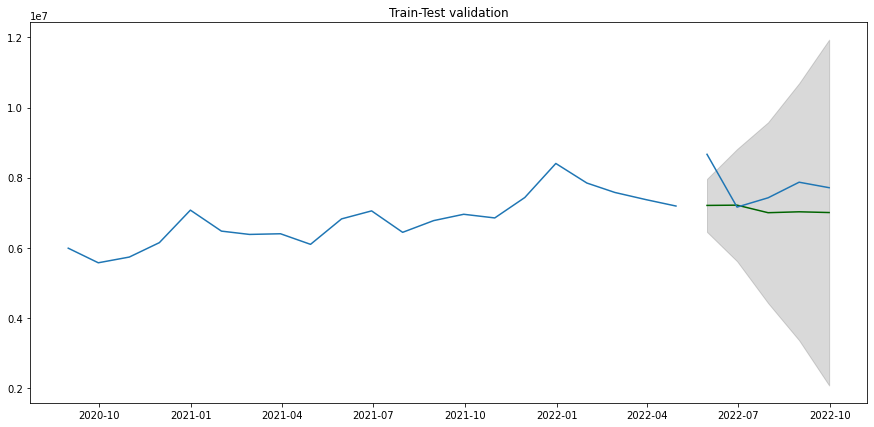

Test RMSE: 840422.042


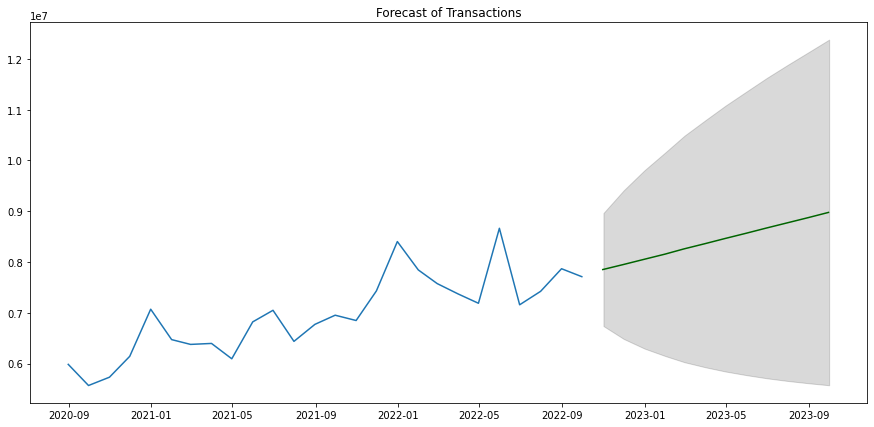

In [39]:
predictions, CI, RMSE, norm_RMSE, test, validation = run_arima(df, 'total', m_val=12, D_val=0)

In [40]:
norm_RMSE

0.5576092978296906

In [41]:
data_lower = np.array([item[0] for item in CI])
data_upper = np.array([item[1] for item in CI])
data_CI_width = data_upper - data_lower

In [42]:
df.total.values.mean()

6974225.576923077

In [43]:
range = df.total.values.max()-df.total.values.min()

In [44]:
CI_norm = data_CI_width/range

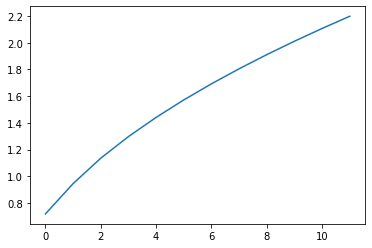

In [45]:
plt.plot(CI_norm)

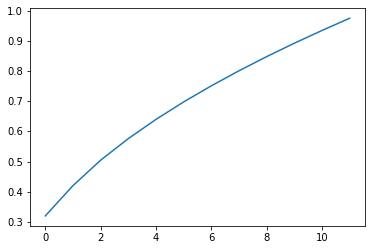

In [46]:
plt.plot(data_CI_width/df.total.values.mean())

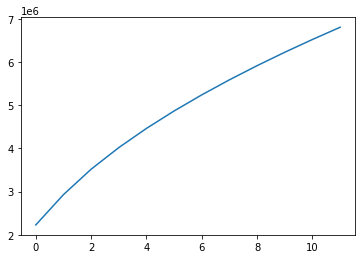

In [47]:
plt.plot(data_CI_width)

In [48]:
data_CI_width.max()

6810826.334222216

In [49]:
df.total.values.min()

5566534.0

In [50]:
df.total.values.max()

8664142.0